# Dynamic light scattering reveals particle diameter

# Introduction

To determine the particle size, we used dynamic light scattering (DLS). DLS measurements of concentrated VLPs were collected using Wyatt Nanostar.

## Imports

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/dynamic_light_scattering"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

# Load data

In [2]:
infile = "/scratch/CellFreeReporter/magic_Horns_RNA_Export_2023/preprocessed_data/dynamic_light_scattering_summary.csv"

df_raw = pd.read_csv(infile, header=0, index_col=None)
print(df_raw.shape)
df_raw.head()

(60, 14)


,Diameter(nm) (4_pFH2-203_r2),% Intensity (4_pFH2-203_r2),Diameter(nm) (5_pFH2-22_r2),% Intensity (5_pFH2-22_r2),Diameter(nm) (1_pFH2-200_r4),% Intensity (1_pFH2-200_r4),Diameter(nm) (DPBS_r1_20acq),% Intensity (DPBS_r1_20acq),Diameter(nm) (2_pFH2-201_dil200X_r2_20acq),% Intensity (2_pFH2-201_dil200X_r2_20acq),Diameter(nm) (3_pFH2-202_dil200X_r1_20acq),% Intensity (3_pFH2-202_dil200X_r1_20acq),Diameter(nm) (pFH2-101_1000X_rep1),% Intensity (pFH2-101_1000X_rep1)
0,0.052963,0.0,0.052963,0.000185,0.052963,0.0,0.052963,0.001359,0.052963,0.050683,0.052963,0.0,0.053969,0.799654
1,0.067165,0.0,0.067165,0.000224,0.067165,0.0,0.067165,0.007810,0.067165,0.079440,0.067165,0.0,0.068441,0.945309
2,0.085176,0.0,0.085176,0.000000,0.085176,0.0,0.085176,0.022854,0.085176,0.142194,0.085176,0.0,0.086795,0.457328
3,0.108017,0.0,0.108017,0.000000,0.108017,0.0,0.108017,0.055288,0.108017,0.243604,0.108017,0.0,0.110069,0.000000
4,0.136983,0.0,0.136983,0.000000,0.136983,0.0,0.136983,0.117443,0.136983,0.356601,0.136983,0.0,0.139586,0.000000


## Rename columns

In [3]:
# Show column names
for x in list(df_raw.columns):
    print(x)

Diameter(nm) (4_pFH2-203_r2)
% Intensity (4_pFH2-203_r2)
Diameter(nm) (5_pFH2-22_r2)
% Intensity (5_pFH2-22_r2)
Diameter(nm) (1_pFH2-200_r4)
% Intensity (1_pFH2-200_r4)
Diameter(nm) (DPBS_r1_20acq)
% Intensity (DPBS_r1_20acq)
Diameter(nm) (2_pFH2-201_dil200X_r2_20acq)
% Intensity (2_pFH2-201_dil200X_r2_20acq)
Diameter(nm) (3_pFH2-202_dil200X_r1_20acq)
% Intensity (3_pFH2-202_dil200X_r1_20acq)
Diameter(nm) (pFH2-101_1000X_rep1)
% Intensity (pFH2-101_1000X_rep1)


In [4]:
# Rename columns
map_columns = {"Diameter(nm) (4_pFH2-203_r2)": "Diameter_EPN24-MCP",
                "% Intensity (4_pFH2-203_r2)": "Intensity_EPN24-MCP",
                "Diameter(nm) (5_pFH2-22_r2)": "Diameter_mCh",
                "% Intensity (5_pFH2-22_r2)": "Intensity_mCh",
                "Diameter(nm) (1_pFH2-200_r4)": "Diameter_MMLV_Gag",
                "% Intensity (1_pFH2-200_r4)": "Intensity_MMLV_Gag",
                "Diameter(nm) (DPBS_r1_20acq)": "Diameter_DPBS",
                "% Intensity (DPBS_r1_20acq)": "Intensity_DPBS",
                "Diameter(nm) (2_pFH2-201_dil200X_r2_20acq)": "Diameter_Gag-MCP",
                "% Intensity (2_pFH2-201_dil200X_r2_20acq)": "Intensity_Gag-MCP",
                "Diameter(nm) (3_pFH2-202_dil200X_r1_20acq)": "Diameter_GagZip-MCP",
                "% Intensity (3_pFH2-202_dil200X_r1_20acq)": "Intensity_GagZip-MCP",
                "Diameter(nm) (pFH2-101_1000X_rep1)": "Diameter_EPN11-MCP",
                "% Intensity (pFH2-101_1000X_rep1)": "Intensity_EPN11-MCP"}

df_raw = df_raw.rename(map_columns, axis=1)

In [5]:
# Show new column names
for x in list(df_raw.columns):
    print(x)

Diameter_EPN24-MCP
Intensity_EPN24-MCP
Diameter_mCh
Intensity_mCh
Diameter_MMLV_Gag
Intensity_MMLV_Gag
Diameter_DPBS
Intensity_DPBS
Diameter_Gag-MCP
Intensity_Gag-MCP
Diameter_GagZip-MCP
Intensity_GagZip-MCP
Diameter_EPN11-MCP
Intensity_EPN11-MCP


In [6]:
# Set colors

exporter_to_color = {"MMLV_Gag": "#95cd87",
                    "Gag-MCP": "#b8b0d7",
                    "GagZip-MCP": "#fbae17",
                    "EPN24-MCP": "#6ec0cf",
                    "EPN11-MCP": "#d58fbe",
                    "mCh": "#bdbfc1"}

# Plot size distributions for viral exporters

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


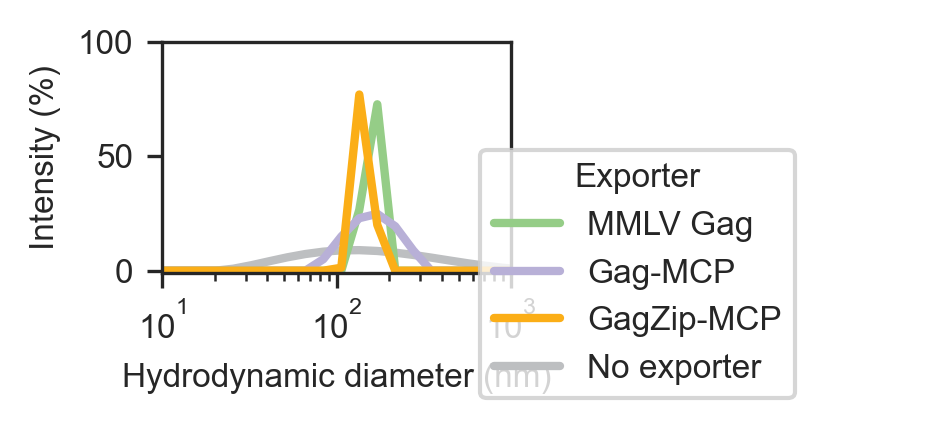

In [7]:
linewidth = 2

fig, ax = plt.subplots(1, 1, figsize=(1.5,1))

exporter = "MMLV_Gag"
label = "MMLV Gag"
x = df_raw["Diameter_" + exporter]
y = df_raw["Intensity_" + exporter]
color = exporter_to_color[exporter]
sns.lineplot(ax=ax, x=x, y=y, label=label, color=color, lw=linewidth)

exporter = "Gag-MCP"
label = "Gag-MCP"
x = df_raw["Diameter_" + exporter]
y = df_raw["Intensity_" + exporter]
color = exporter_to_color[exporter]
sns.lineplot(ax=ax, x=x, y=y, label=label, color=color, lw=linewidth)

exporter = "GagZip-MCP"
label = "GagZip-MCP"
x = df_raw["Diameter_" + exporter]
y = df_raw["Intensity_" + exporter]
color = exporter_to_color[exporter]
sns.lineplot(ax=ax, x=x, y=y, label=label, color=color, lw=linewidth)

exporter = "mCh"
label = "No exporter"
x = df_raw["Diameter_" + exporter]
y = df_raw["Intensity_" + exporter]
color = exporter_to_color[exporter]
sns.lineplot(ax=ax, x=x, y=y, label=label, color=color, lw=linewidth, zorder=-1)

ax.set_xscale("log")
ax.set_xlim(10, 1e3)
ax.set_ylim(-1, 100)

ax.set_xlabel("Hydrodynamic diameter (nm)")
ax.set_ylabel("Intensity (%)")

ax.get_legend().remove()
fig.legend(loc="center left", bbox_to_anchor=(1.03, 0.5), title="Exporter")

save_figure(fig, "diameter_viral")

# Plot size distributions for nanocage-based exporters

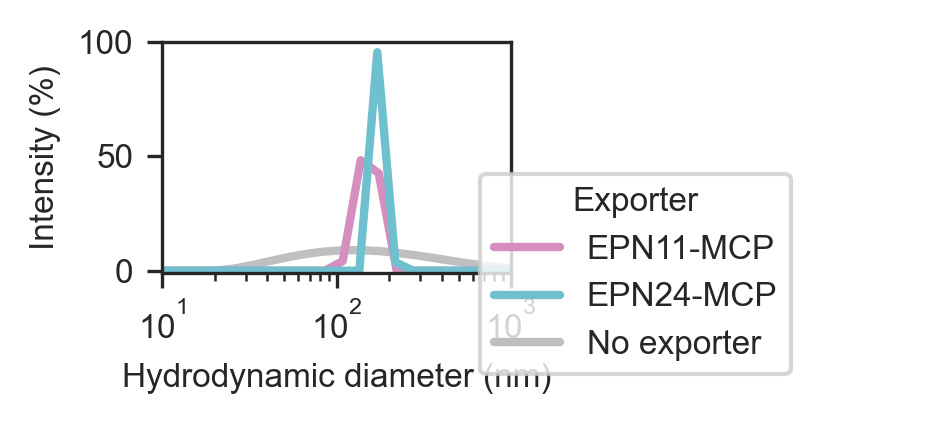

In [8]:
linewidth = 2

fig, ax = plt.subplots(1, 1, figsize=(1.5,1))

exporter = "EPN11-MCP"
label = "EPN11-MCP"
x = df_raw["Diameter_" + exporter]
y = df_raw["Intensity_" + exporter]
color = exporter_to_color[exporter]
sns.lineplot(ax=ax, x=x, y=y, label=label, color=color, lw=linewidth)

exporter = "EPN24-MCP"
label = "EPN24-MCP"
x = df_raw["Diameter_" + exporter]
y = df_raw["Intensity_" + exporter]
color = exporter_to_color[exporter]
sns.lineplot(ax=ax, x=x, y=y, label=label, color=color, lw=linewidth)

exporter = "mCh"
label = "No exporter"
x = df_raw["Diameter_" + exporter]
y = df_raw["Intensity_" + exporter]
color = exporter_to_color[exporter]
sns.lineplot(ax=ax, x=x, y=y, label=label, color=color, lw=linewidth, zorder=-1)

ax.set_xscale("log")
ax.set_xlim(10, 1e3)
ax.set_ylim(-1, 100)

ax.set_xlabel("Hydrodynamic diameter (nm)")
ax.set_ylabel("Intensity (%)")

ax.get_legend().remove()
fig.legend(loc="center left", bbox_to_anchor=(1.03, 0.5), title="Exporter")

save_figure(fig, "diameter_EPN")

# Report mean diameter

In [9]:
# Calculate and report weighted average diameter

print("MMLV Gag")
print(np.average(df_raw["Diameter_MMLV_Gag"], weights=df_raw["Intensity_MMLV_Gag"]))
print()

print("Gag-MCP")
print(np.average(df_raw["Diameter_Gag-MCP"], weights=df_raw["Intensity_Gag-MCP"]))
print()

print("GagZip-MCP")
print(np.average(df_raw["Diameter_GagZip-MCP"], weights=df_raw["Intensity_GagZip-MCP"]))
print()

print("EPN24-MCP")
print(np.average(df_raw["Diameter_EPN24-MCP"], weights=df_raw["Intensity_EPN24-MCP"]))
print()

print("EPN11-MCP")
print(np.average(df_raw["Diameter_EPN11-MCP"], weights=df_raw["Intensity_EPN11-MCP"]))
print()

MMLV Gag
159.8717104419575

Gag-MCP
1002.1338024523445

GagZip-MCP
139.25457808780988

EPN24-MCP
171.03118706334791

EPN11-MCP
862.2156097408892



In [10]:
# Calculate and report weighted average diameter
# Restrict analysis to diameters between 10 and 1000 nm
# Otherwise, result is dominated by outliers of diameters

df_subset = df_raw.loc[(df_raw["Diameter_EPN24-MCP"] > 10) & (df_raw["Diameter_EPN24-MCP"] < 1000)]

# Calculate and report weighted average diameter

print("MMLV Gag")
print(np.average(df_subset["Diameter_MMLV_Gag"], weights=df_subset["Intensity_MMLV_Gag"]))
print()

print("Gag-MCP")
print(np.average(df_subset["Diameter_Gag-MCP"], weights=df_subset["Intensity_Gag-MCP"]))
print()

print("GagZip-MCP")
print(np.average(df_subset["Diameter_GagZip-MCP"], weights=df_subset["Intensity_GagZip-MCP"]))
print()

print("EPN24-MCP")
print(np.average(df_subset["Diameter_EPN24-MCP"], weights=df_subset["Intensity_EPN24-MCP"]))
print()

print("EPN11-MCP")
print(np.average(df_subset["Diameter_EPN11-MCP"], weights=df_subset["Intensity_EPN11-MCP"]))
print()

MMLV Gag
160.90918805646868

Gag-MCP
166.16688569459373

GagZip-MCP
141.4683429885652

EPN24-MCP
172.283885082719

EPN11-MCP
152.22383572834036

